# Compartilhamento de bicicletas na cidade de Chicago - Estados Unidos

## Introdução

#### Sobre os dados

Nesse projeto dados sobre o compartilhamento de bicicletas na cidade de Chicago são analisados. Os dados foram obtidos do Kaggle (https://www.kaggle.com/datasets/evangower/cyclistic-bike-share). Esses dados também são utilizados como um caso de estudo do curso Google Data Analytics do Coursera, que eu não cursei.

#### O período de coleta

Os dados contém informações sobre o uso do sistema no período de um ano, entre os meses de Abril de 2021 à março de 2022. 

#### Os tipos de bicicleta

Três diferentes tipos de bicleta são descriminados nos dados, em inglês: "Classic", "Docked" e "Electric". Aqui eles serão designados em português como: Clássica, Ancorada e Elétrica.

Não há informações detalhadas sobre o funcionamento do sistema mas supõe-se que as bicicletas "clássicas" sejam bicicletas que não ficam ancoradas a uma estação, diferentemente das "ancoradas".   

#### Localizações 

Há informações sobre as coordenadas de início e fim do uso das bicicletas e também o nome das estações correspondentes. Porém, existem dados com as coordenadas dos locais mas sem o nome das estações. Não está claro se os dados com os nomes das estações faltantes referem-se a ínicio ou fim de compartilhamento que ocorrem fora das estações ou se é algum outro fator.     

De qualquer forma, a maior parte dos dados (mais de 86%) apresenta informação completa sobre a localização. Isso também indica que mesmo para as bicicletas "clássicas" e "elétricas" as estações são amplamente utilizadas. Talvez exista uma exigência, que não está clara olhando apenas para os dados, de que as bicicletas sempre fiquem nas estações após o uso ou ainda as pessoas podem preferir utilizar as estações por outros motivos, como por exemplo realizar o pagamento em máquinas de cobrança.

As análises que envolvem localização serão focadas nos compartilhamentos que contém os nomes das estações.

#### Usuários casuais e membros

Por fim, os dados discriminam se um usuário é casual ou membro. Novamente, não há detalhamento sobre a diferença entre essas classes.

#### Análises e Insights

A seguir, uma análise detalhada desses dados é realizada.  Em especial, será explorado como a utilização das bicicletas varia ao longo do ano, como se comporta a distribuição dos tempos de utilização nos dados, quais são as estações mais utilizadas, etc.

Os resultados obtidos nas análises realizadas fornecem uma riquíssima fonte de informações úteis para serem aplicadas na administração do sistema. Por exemplo, a variação no uso ao longo do ano indica a melhor época do ano para realizar manutenções nas bicicletas. A distribuição do tempo de uso, por outro lado, pode ser utilizada na precificação dos serviços. Também, as informações sobre a utilização das diferentes estações pode auxiliar na distribuição e relocação das bicicletas.

## Carregamento dos dados e pré-análise

In [1]:
# importa a biblioteca pandas
import pandas as pd

In [2]:
# importa a biblioteca glob 
from glob import glob

# cria uma lista com o nome dos arquivos para serem importados
files = sorted(glob('20*.csv'))

# lista vazia que receberá os diferentes dataframes importados
content = []
# colunas que serão importadas dos dados
colunas = ["rideable_type", "started_at", "ended_at", "start_station_name", "end_station_name", "member_casual"]  
    
# percorre a lista "files" e carrega os dados    
for filename in files:
    df = pd.read_csv(filename, index_col=None, usecols = colunas)
    # adiciona o dataframe carregado à lista "content"
    content.append(df)
    
# gera um único dataframe formado pela junção dos dados de cada mês   
data = pd.concat(content, ignore_index = True)

In [3]:
data.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual
0,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,Southport Ave & Waveland Ave,member
1,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,Dorchester Ave & 49th St,casual
2,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,Loomis Blvd & 84th St,casual
3,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,Southport Ave & Waveland Ave,member
4,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,Loomis Blvd & 84th St,casual


In [4]:
# cria uma nova coluna contendo o ano e mês da utilização
data['year_month'] = data['started_at'].apply(lambda x: x[:7])

In [5]:
data.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,year_month
0,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,Southport Ave & Waveland Ave,member,2021-04
1,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,Dorchester Ave & 49th St,casual,2021-04
2,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,Loomis Blvd & 84th St,casual,2021-04
3,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,Southport Ave & Waveland Ave,member,2021-04
4,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,Loomis Blvd & 84th St,casual,2021-04


## Utilização dos diferentes tipos de bicicletas ao longo dos meses

In [6]:
# filtra os dados por mês de utilização e tipo de bicicleta
month_type = data.groupby(['year_month', 'rideable_type'])['rideable_type'].count().unstack().fillna(0)
# renomeação dos nomes das colunas
month_type.rename(columns = {"classic_bike" : "Clássica", "docked_bike" : "Ancorada", "electric_bike" : "Elétrica"})

rideable_type,Clássica,Ancorada,Elétrica
year_month,,,
2021-04,214619,24714,97897
2021-05,309093,43353,179187
2021-06,435020,51716,242859
2021-07,506909,57698,257803
2021-08,503033,45065,256254
2021-09,462284,35337,258526
2021-10,316139,22884,292203
2021-11,154039,7614,198325
2021-12,100635,4928,141977


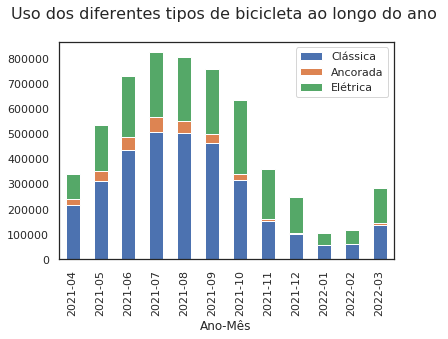

In [7]:
# importa as bibliotecas matplotlib e seaborn para a visualização gráfica dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# ajusta a estética dos gráficos do seaborn 
sns.set(style='white')

# cria um gráfico de barras verticais
month_type.plot(kind='bar', stacked=True) 
plt.xlabel('Ano-Mês')
plt.title('Uso dos diferentes tipos de bicicleta ao longo do ano \n', fontsize = 16)
plt.legend(['Clássica', 'Ancorada', 'Elétrica'])
plt.show()

Há uma forte variação sazonal no uso das bicicletas. Como esperado, o uso das bicicletas tem forte queda nos meses de inverno no emisfério norte. 

Um outro ponto interessante é que a queda relativa é menor para as bicicletas elétricas. Nos meses de janeiro e fevereiro o número de aluguéis dessas bicicletas parece bastante próximo das bicicletas clássicas, enquanto que nos meses de verão as clássicas representam uma fração consideravelmente maior. 

## Utilização das bicicletas de acordo com o dia da semana

In [8]:
# cria uma nova coluna contendo o dia da semana em que o compartilhamento foi iniciado
data['week_day'] = pd.to_datetime(data['started_at']).dt.day_name()

In [9]:
data.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,year_month,week_day
0,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,Southport Ave & Waveland Ave,member,2021-04,Monday
1,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,Dorchester Ave & 49th St,casual,2021-04,Tuesday
2,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,Loomis Blvd & 84th St,casual,2021-04,Saturday
3,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,Southport Ave & Waveland Ave,member,2021-04,Saturday
4,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,Loomis Blvd & 84th St,casual,2021-04,Saturday


In [10]:
# filtra os dados por dia da semana de utilização e tipo de bicicleta
week_day_type = data.groupby(['week_day', 'rideable_type'])['rideable_type'].count().unstack().fillna(0)
# renomeação dos nomes das colunas
week_day_type.rename(columns = {"classic_bike" : "Clássica", "docked_bike" : "Ancorada", "electric_bike" : "Elétrica"})

rideable_type,Clássica,Ancorada,Elétrica
week_day,,,
Friday,453220,41291,322884
Monday,412534,35795,284102
Saturday,571866,74530,334950
Sunday,507201,68720,294661
Thursday,432692,27702,308572
Tuesday,428045,28508,309921
Wednesday,445133,27443,313762


In [11]:
# coloca os dias da semana na ordem correta
week_day_type = week_day_type.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [12]:
week_day_type

rideable_type,classic_bike,docked_bike,electric_bike
week_day,,,
Monday,412534,35795,284102
Tuesday,428045,28508,309921
Wednesday,445133,27443,313762
Thursday,432692,27702,308572
Friday,453220,41291,322884
Saturday,571866,74530,334950
Sunday,507201,68720,294661


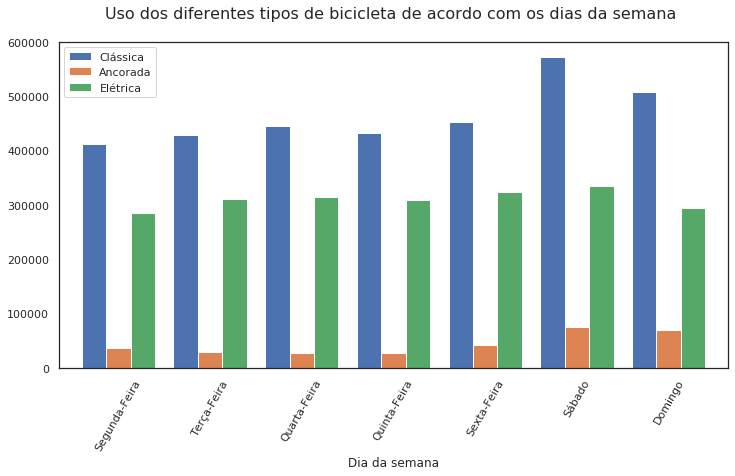

In [13]:
# cria um gráfico de barras verticais
ax = week_day_type.plot(kind='bar', stacked=False, width = 0.8, figsize = (12, 6)) 
plt.xlabel('Dia da semana')
plt.title('Uso dos diferentes tipos de bicicleta de acordo com os dias da semana \n', fontsize = 16)
plt.legend(['Clássica', 'Ancorada', 'Elétrica'])
ax.set_xticklabels(['Segunda-Feira', 'Terça-Feira', 'Quarta-Feira', 'Quinta-Feira', 'Sexta-Feira', 'Sábado',
                    'Domingo'] , rotation = 60)
plt.show()

Para todos os tipos o dia da semana com o maior número de compartilhamentos é sábado. Porém, essa variação é bem suave para as bicicletas elétricas e um pouco mais acentuada para as clássicas e ancoradas. 

## Utilização por usuários casuais e membros

In [14]:
# verifica os tipos de usuários descriminados nos dados
data['member_casual'].unique()

array(['member', 'casual'], dtype=object)

In [15]:
# agrupa os dados nas classes "membro" e "casual" e indica a quantidade de compartilhamentos por tipo de  bicicleta
type_membership = data.groupby(['member_casual', 'rideable_type'])['rideable_type'].count().unstack().fillna(0)

In [16]:
type_membership

rideable_type,classic_bike,docked_bike,electric_bike
member_casual,,,
casual,1257643.0,303989.0,984910.0
member,1993048.0,0.0,1183942.0


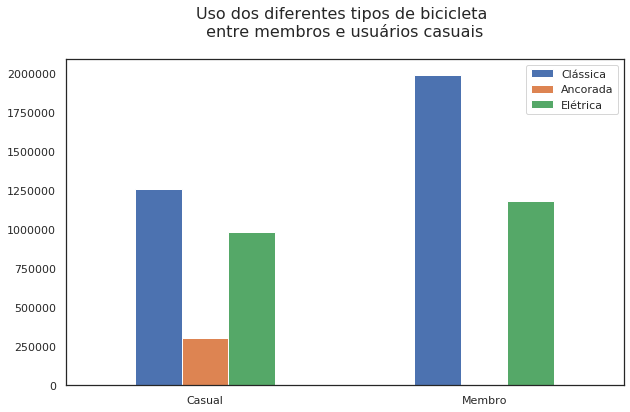

In [17]:
#cria um gráfico de barras verticais
ax = type_membership.plot(kind='bar', stacked=False, figsize = (10, 6)) 
plt.xlabel('')
plt.title('Uso dos diferentes tipos de bicicleta \n entre membros e usuários casuais \n', fontsize =16)
plt.legend(['Clássica', 'Ancorada', 'Elétrica'])
ax.set_xticklabels(['Casual', 'Membro'], rotation = 0)
plt.show()

## Durações dos compartilhamentos

In [18]:
# importa a biblioteca numpy
import numpy as np

# transforma as strings em data e calcula o intervalo de tempo
diff = (pd.to_datetime(data['ended_at']) - pd.to_datetime(data['started_at']))

# cria uma nova coluna com a duração do aluguel em minutos
data['duracao_min'] = diff * 60 / np.timedelta64(1, 'h')

In [19]:
data.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,year_month,week_day,duracao_min
0,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,Southport Ave & Waveland Ave,member,2021-04,Monday,31.316667
1,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,Dorchester Ave & 49th St,casual,2021-04,Tuesday,64.300000
2,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,Loomis Blvd & 84th St,casual,2021-04,Saturday,5697.650000
3,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,Southport Ave & Waveland Ave,member,2021-04,Saturday,25.100000
4,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,Loomis Blvd & 84th St,casual,2021-04,Saturday,91.283333


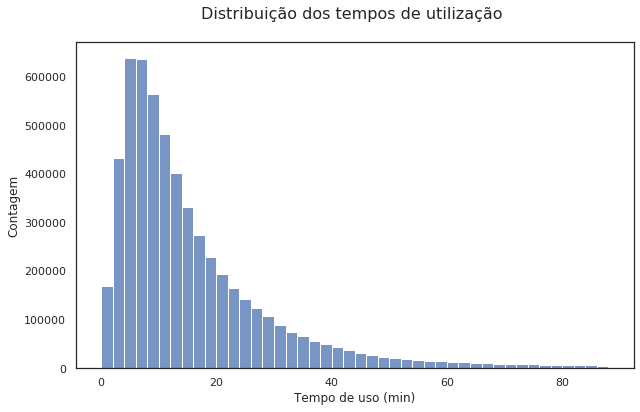

In [20]:
# produz um histograma com a distribuição da duração dos compartilhamentos
fig = plt.figure(figsize = (10, 6))
sns.histplot(data=data, x="duracao_min", bins = np.arange(0, 90, 2))
plt.xlabel('Tempo de uso (min)')
plt.ylabel('Contagem')
plt.title('Distribuição dos tempos de utilização \n', fontsize =  16)
plt.show()

A distribuição é assimétrica à direita. A maioria dos compartilhamentos tem breve duração mas há vários registros de compartilhamentos mais longos.

In [21]:
# calcula a duração média dos compartilhamentos
avg_duration = data['duracao_min'].mean()
# calcula a mediana da duração dos compartilhamentos
median_duration = data['duracao_min'].median()

print('A média do tempo de uso das bicicletas é de {:.2f} minutos e a mediana é {:.2f} minutos.'.format(avg_duration, median_duration))

A média do tempo de uso das bicicletas é de 21.54 minutos e a mediana é 11.72 minutos.


A distribuição apresentada engloba todos os tipos de bicicleta. Abaixo as distribuições para cada tipo de bicicleta são apresentadas.

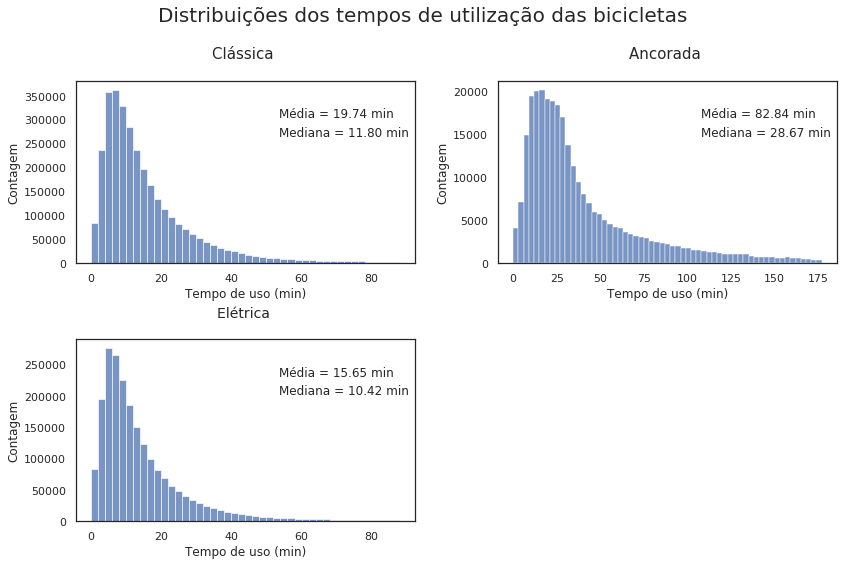

In [27]:
fig = plt.figure(figsize=(12,8))

fig.suptitle('Distribuições dos tempos de utilização das bicicletas \n \n', fontsize=20)

plt.subplot(2, 2, 1)

# calcula a média da duração dos compartilhamentos de bicicletas clássicas
avg_classic = data[data['rideable_type'] == 'classic_bike']['duracao_min'].mean()
# calcula a mediana da duração dos compartilhamentos de bicicletas clássicas
median_classic = data[data['rideable_type'] == 'classic_bike']['duracao_min'].median()

# produz um histograma com a distribuição das durações dos compartilhamentos das bicicletas clássicas
ax1 = sns.histplot(data=data[data['rideable_type'] == 'classic_bike'], x="duracao_min", bins = np.arange(0, 90, 2))
plt.xlabel('Tempo de uso (min)')
plt.ylabel('Contagem')
plt.title('Clássica \n', fontsize = 15)

plt.text(0.6, 0.8, 'Média = {:.2f} min'.format(avg_classic),
         transform = ax1.transAxes)
plt.text(0.6, 0.7, 'Mediana = {:.2f} min'.format(median_classic),
         transform = ax1.transAxes)

plt.subplot(2, 2, 2)

# calcula a média da duração dos compartilhamentos de bicicletas ancoradas
avg_docked = data[data['rideable_type'] == 'docked_bike']['duracao_min'].mean()
# calcula a mediana da duração dos compartilhamentos de bicicletas ancoradas
median_docked = data[data['rideable_type'] == 'docked_bike']['duracao_min'].median()

# produz um histograma com a distribuição das durações dos compartilhamentos das bicicletas ancoradas
ax2 = sns.histplot(data=data[data['rideable_type'] == 'docked_bike'], x="duracao_min", bins = np.arange(0, 180, 3))
plt.xlabel('Tempo de uso (min)')
plt.ylabel('Contagem')
plt.title('Ancorada \n', fontsize = 15)

plt.text(0.6, 0.8, 'Média = {:.2f} min'.format(avg_docked),
         transform = ax2.transAxes)
plt.text(0.6, 0.7, 'Mediana = {:.2f} min'.format(median_docked),
         transform = ax2.transAxes)

plt.subplot(2, 2, 3)

# calcula a média da duração dos compartilhamentos de bicicletas elétricas
avg_electric = data[data['rideable_type'] == 'electric_bike']['duracao_min'].mean()
# calcula a mediana da duração dos compartilhamentos de bicicletas elétricas
median_electric = data[data['rideable_type'] == 'electric_bike']['duracao_min'].median()

# produz um histograma com a distribuição das durações dos compartilhamentos das bicicletas elétricas
ax3 = sns.histplot(data=data[data['rideable_type'] == 'electric_bike'], x="duracao_min", bins = np.arange(0, 90, 2))
plt.xlabel('Tempo de uso (min)')
plt.ylabel('Contagem')
plt.title('Elétrica \n', fontsize = 14)

plt.text(0.6, 0.8, 'Média = {:.2f} min'.format(avg_electric),
         transform = ax3.transAxes)
plt.text(0.6, 0.7, 'Mediana = {:.2f} min'.format(median_electric),
         transform = ax3.transAxes)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

Há uma marcante diferença nos tempos de uso das bicicletas ancoradas. As bicicletas clássicas e elétricas apresentam distribuições semelhantes com médias e medianas relativamente próximas entre si mas muito menores do que a média e mediana das bicicletas ancoradas.

#### Variação da duração ao longo dos meses

In [28]:
# lista contendo as strings com os meses do ano
meses = data['year_month'].unique()

medias = []
medianas = []

# calcula as médias e medianas para cada mês e produz duas listas com esses valores
for mes in meses:
    medias.append(data[data['year_month'] == mes]['duracao_min'].mean())
    medianas.append(data[data['year_month'] == mes]['duracao_min'].median())

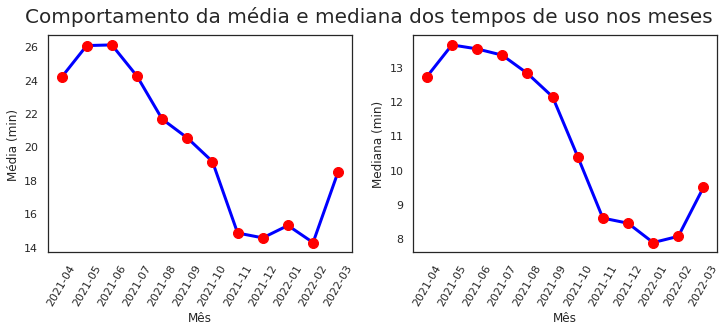

In [30]:
fig = plt.figure(figsize=(12,4))

fig.suptitle('Comportamento da média e mediana dos tempos de uso nos meses \n', fontsize=20)

plt.subplot(1, 2, 1)
plt.plot(medias, color='blue', linewidth=3,
         marker='o', markerfacecolor='red', markeredgecolor='red',
         markersize=10)
plt.xlabel('Mês')
plt.ylabel('Média (min)')
plt.xticks(range(len(meses)),meses, rotation = 60)

plt.subplot(1, 2, 2)
plt.plot(medianas, color='blue', linewidth=3,
         marker='o', markerfacecolor='red', markeredgecolor='red',
         markersize=10)
plt.xlabel('Mês')
plt.ylabel('Mediana (min)')
plt.xticks(range(len(meses)),meses, rotation = 60)
plt.show()


A evolução da média e mediana será analisada agora para cada tipo de bicicleta.

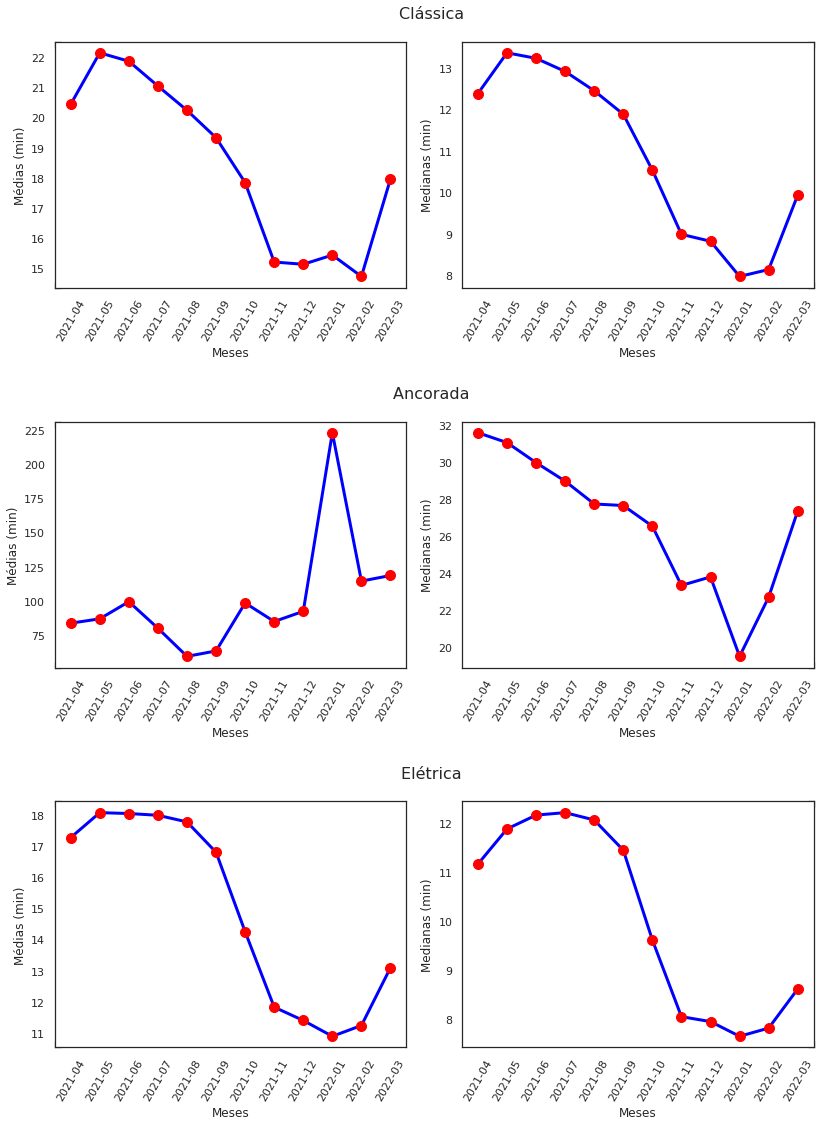

In [39]:
bike_types = ['classic_bike', 'docked_bike', 'electric_bike']
nomes = ['Clássica', 'Ancorada', 'Elétrica']

fig, big_axes = plt.subplots( figsize=(12.0, 16.0) , nrows=3, ncols=1)  

for row, big_ax in enumerate(big_axes, start=1):
    big_ax.set_title("%s \n" % nomes[row - 1], fontsize=16)

    big_ax.tick_params(labelcolor=(1.,1.,1., 0.), top='off', bottom='off', left='off', right='off', direction = 'in')
    big_ax._frameon = False


for i in range(len(bike_types)):
    medias = []
    medianas = []

    for mes in meses:
        medias.append(data[(data['year_month'] == mes) 
                           & (data['rideable_type'] ==  bike_types[i])]['duracao_min'].mean())
        medianas.append(data[(data['year_month'] == mes) 
                             & (data['rideable_type'] ==  bike_types[i])]['duracao_min'].median())


    fig.add_subplot(3, 2, 2*i + 1)
    plt.plot(medias, color='blue', linewidth=3, 
             marker='o', markerfacecolor='red', markeredgecolor='red', markersize=10)
    plt.xlabel('Meses')
    plt.ylabel('Médias (min)')
    plt.xticks(range(len(meses)),meses, rotation = 60)

    fig.add_subplot(3, 2, 2*i + 2)
    plt.plot(medianas, color='blue', linewidth=3,
         marker='o', markerfacecolor='red', markeredgecolor='red', markersize=10)
    plt.xlabel('Meses')
    plt.ylabel('Medianas (min)')
    plt.xticks(range(len(meses)),meses, rotation = 60)

plt.tight_layout()    
plt.show()    



Assim como o número de compartilhamentos varia com os meses do ano também observa-se variação na duração dos compartilhamentos. Para as bicicletas clássicas e elétricas a duração é maior no verão e menor no inverno. O comportamento da média das bicicletas ancoradas tem um pico bastante acentuado em janeiro, provavelmente ocasionado por poucos compartilhamentos com longa duração. A mediana das bicicletas ancoradas tem um comportamento mais regular com maiores valores no verão e valores menores no inverno, assim como os outros tipos.

## Uso das estações

In [42]:
# número de dados faltantes em cada coluna
faltantes = data.isnull().sum()
faltantes

rideable_type              0
started_at                 0
ended_at                   0
start_station_name    745376
end_station_name      796247
member_casual              0
year_month                 0
week_day                   0
duracao_min                0
dtype: int64

In [60]:
# número de nomes de estações de início faltantes 
falt_start = faltantes['start_station_name']
# número de nomes de estações de término faltantes 
falt_end = faltantes['end_station_name']
# número total de dados
total = data.shape[0]

print('Há {} nomes de estações de início faltantes, que corresponde a {:.2%} dos dados.'.format(falt_start, 
                                                        falt_start/total))
print('Há {} nomes de estações de término faltantes, que corresponde a {:.2%} dos dados.'.format(falt_end, 
                                                        falt_end/total))

Há 745376 nomes de estações de início faltantes, que corresponde a 13.02% dos dados.
Há 796247 nomes de estações de término faltantes, que corresponde a 13.91% dos dados.


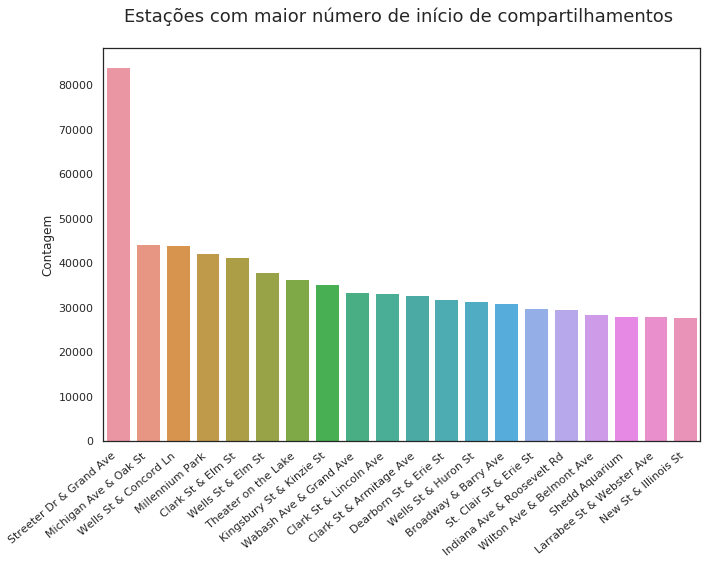

In [62]:
fig = plt.figure(figsize = (10, 8))
ax = sns.countplot(x = "start_station_name", data = data, 
              order = data['start_station_name'].value_counts().index[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Estações com maior número de início de compartilhamentos \n', fontsize = 18)
plt.xlabel('')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

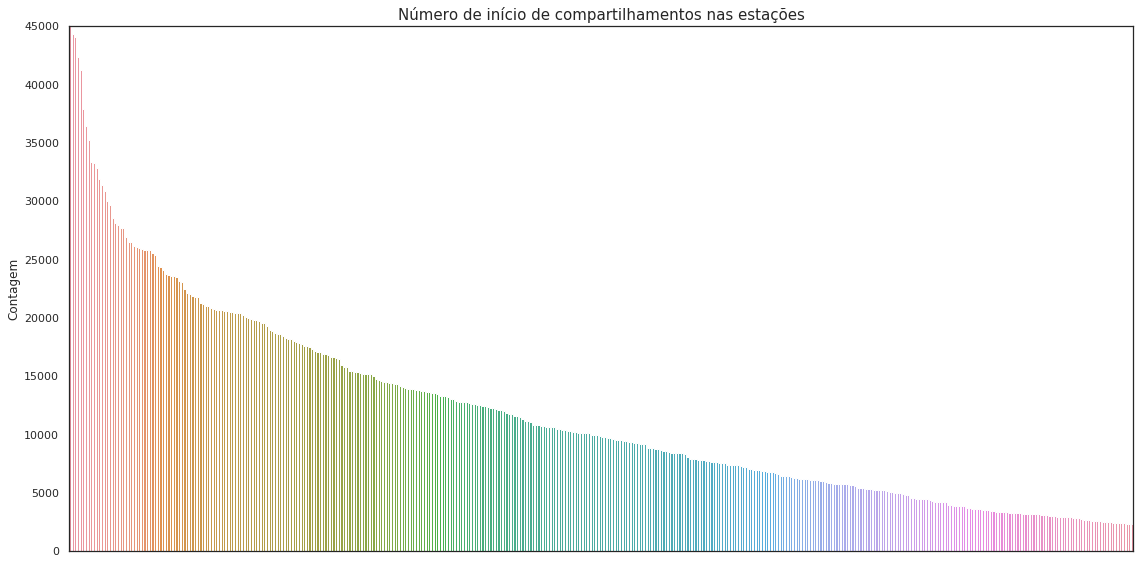

In [63]:
fig = plt.figure(figsize = (16, 8))
ax = sns.countplot(x = "start_station_name", data = data, 
              order = data['start_station_name'].value_counts().index[:400], dodge = False)
ax.set_xticklabels([])
plt.title('Número de início de compartilhamentos nas estações', fontsize = 15)
plt.ylim(0, 45000)
plt.xlabel('')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

A estação "Streeter Dr & Grand Ave" é de longe a estação com o maior número de partidas. 

In [66]:
# número total de estações que contém partidas
num_start_stations = len(data['start_station_name'].unique())

# número de estações como menos de 100 partidas
menos_100_part = sum(data['start_station_name'].value_counts() < 100)
print('Existem {} ({:.2%}) estações com menos de 100 partidas ao longo desse período.'.format(menos_100_part
                                                             , menos_100_part / num_start_stations))

Existem 144 (16.71%) estações com menos de 100 partidas ao longo desse período.


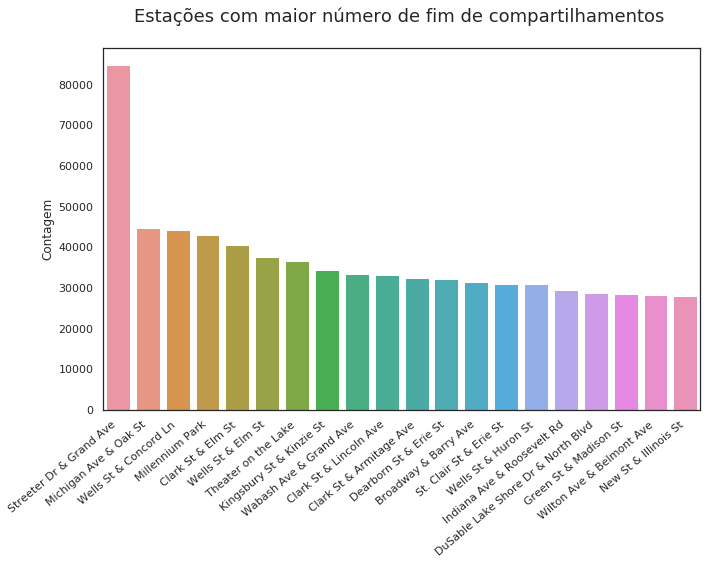

In [67]:
fig = plt.figure(figsize = (10, 8))
ax = sns.countplot(x = "end_station_name", data = data, 
              order = data['end_station_name'].value_counts().index[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Estações com maior número de fim de compartilhamentos \n', fontsize = 18)
plt.xlabel('')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

Para analisar a distribuições dos trajetos, que serão caracterizados pelo local de início e fim do compartilhamento, todos os dados que contenham dados faltantes no nome de início ou fim serão removidos.

In [68]:
# remove as linhas que não possuem nome da estação de início ou da estação final
new_data = data.dropna(subset=['start_station_name', 'end_station_name'])

In [70]:
# verifica se ainda há dados faltantes
new_data.isnull().sum()

rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
member_casual         0
year_month            0
week_day              0
duracao_min           0
dtype: int64

In [71]:
# cria um pandas series com os trajetos (início e fim) de cada utilização
start_end = new_data['start_station_name'] + ' - ' + new_data['end_station_name']

In [73]:
# cria um dataframe com os trajetos
trajetos = pd.DataFrame(start_end, columns = ['trajetos'])

In [74]:
trajetos

,trajetos
0,State St & Pearson St - Southport Ave & Wavela...
1,Dorchester Ave & 49th St - Dorchester Ave & 49...
2,Loomis Blvd & 84th St - Loomis Blvd & 84th St
3,Honore St & Division St - Southport Ave & Wave...
4,Loomis Blvd & 84th St - Loomis Blvd & 84th St
...,...
5723525,Michigan Ave & Oak St - Streeter Dr & Grand Ave
5723526,Sheridan Rd & Irving Park Rd - Streeter Dr & G...
5723527,Michigan Ave & Oak St - Streeter Dr & Grand Ave
5723528,Broadway & Barry Ave - Ravenswood Ave & Bertea...


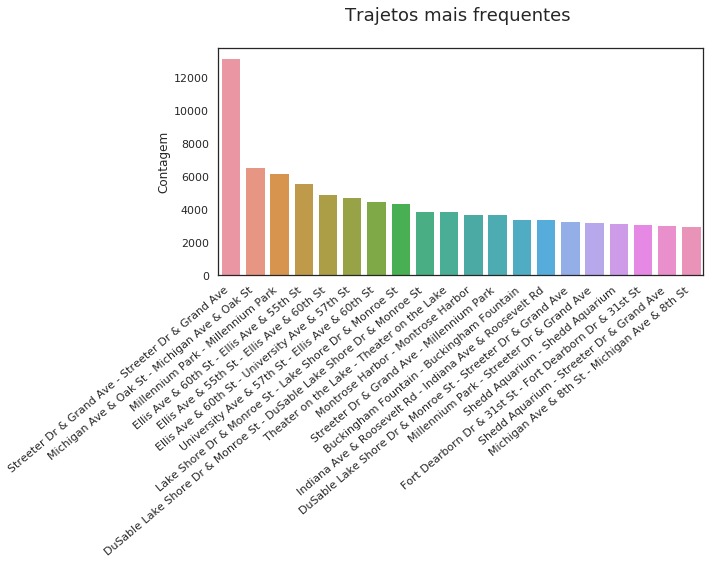

In [75]:
fig = plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'trajetos', data = trajetos, 
              order = trajetos['trajetos'].value_counts().index[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Trajetos mais frequentes \n', fontsize = 18)
plt.xlabel('')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

In [76]:
end_equal_start = sum(new_data['start_station_name'] == new_data['end_station_name'])
end_diff_start = sum(new_data['start_station_name'] != new_data['end_station_name']) 

print('Em {} vezes o local de início foi o mesmo do final.'.format(end_equal_start))
print('Em {} vezes o local de início foi diferente do final.'.format(end_diff_start))


Em 332946 vezes o local de início foi o mesmo do final.
Em 4308449 vezes o local de início foi diferente do final.
